In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from single import Wrapper

est = Wrapper(
    epochs=100, verbose=True, tuning=10, damper="adamw",
    
)
est.set_params(
    lr=1e-3,
    initial_batch_size=64,
    weight_decay=0.01,
)

/home/sieverts/Developer/adadamp-experiments/exp-autoencoder/train.py


Wrapper(damper='adamw', epochs=100, initial_batch_size=64, lr=0.001, tuning=10,
        verbose=True, weight_decay=0.01)

In [3]:
seeds = 10 + (np.arange(3 * 2) // 2).reshape(3, 2)
est.fit(seeds)

n_params = 6.2M
Using downloaded and verified file: _traindata/svhn/train_32x32.mat
Using downloaded and verified file: _traindata/svhn/test_32x32.mat
{'epochs': '0.000e+00', 'model_updates': 0, 'train_loss': '130.3', 'test_loss': '130.7'}
1 36.169524908065796
{'epochs': '1.00', 'model_updates': 916, 'damping': 64, 'train_loss': '39.4', 'test_loss': '38.9'}
1 35.85512566566467
{'epochs': '2.00', 'model_updates': 1832, 'damping': 64, 'train_loss': '32.3', 'test_loss': '32.0'}
1 35.774298906326294
{'epochs': '3.00', 'model_updates': 2748, 'damping': 64, 'train_loss': '28.5', 'test_loss': '28.3'}
1 37.13001108169556
{'epochs': '4.00', 'model_updates': 3664, 'damping': 64, 'train_loss': '24.3', 'test_loss': '24.2'}
1 36.631895303726196
{'epochs': '5.00', 'model_updates': 4580, 'damping': 64, 'train_loss': '21.2', 'test_loss': '21.1'}
1 36.34514665603638
{'epochs': '6.00', 'model_updates': 5496, 'damping': 64, 'train_loss': '19.7', 'test_loss': '19.7'}
1 36.5060658454895
{'epochs': '7.00', 

Wrapper(damper='adamw', epochs=100, initial_batch_size=64, lr=0.001, tuning=10,
        verbose=True, weight_decay=0.01)

In [4]:
import torch
torch.save(est.model_.to("cpu"), "_test_model_300.pt")

/home/sieverts/Developer/adadamp-experiments/exp-autoencoder/train.py
CUDA_VISIBLE_DEVICES=0


In [5]:
import pandas as pd
df = pd.DataFrame(est.data_)
df.to_csv("_test_train_data_300.csv")

In [5]:
x = 1

In [6]:
import torch

est2 = torch.load("_test_model_300.pt")#, weights_only=True)

/tmp/ipykernel_1389117/511088058.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  est2 = torch.load("_test_model_300.pt")#, weights_only=True)


In [8]:
from train import Images
from torchvision.transforms import v2
# test_set = NoisyImages(_dir, split="test", transform=v2.Compose(transform_test), download=True

_dir = "_traindata/svhn"

transform_test = [
     v2.ToImage(),
     v2.ToDtype(torch.float32, scale=True),
]
train_set = Images(
    _dir, split="train", transform=v2.Compose(transform_test), download=True,
)

Using downloaded and verified file: _traindata/svhn/train_32x32.mat


torch.Size([1, 3, 32, 32]) torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32]) torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32]) torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32]) torch.Size([3, 32, 32])


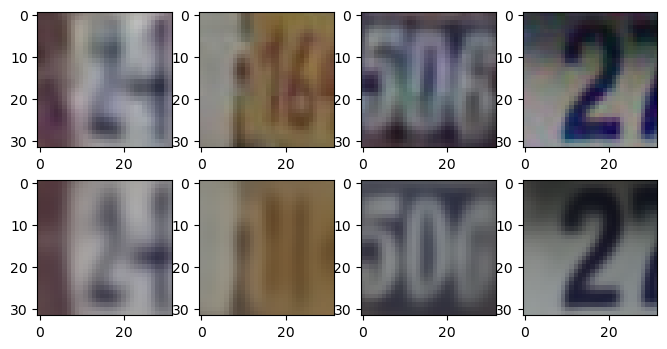

In [13]:
import numpy as np
import matplotlib.pyplot as plt

ArrayLike = np.ndarray

def torch2mpl(img: torch.Tensor) -> ArrayLike:
    img = img.detach().numpy()
    r, g, b = img[0], img[1], img[2]
    new_img = np.zeros((*r.shape, 3))
    new_img[:, :, 0] = r
    new_img[:, :, 1] = g
    new_img[:, :, 2] = b
    return new_img

idx = np.random.uniform(len(train_set), size=4)

w = 2
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(4 * w, 2 * w))

for k, img_idx in enumerate(idx):
    img_n, img_true = train_set[int(img_idx)]
    img_n = img_n.reshape(1, *img_n.shape)

    img_est = est2(img_n)

    print(img_est.shape, img_est[0].shape)
    img_est = torch2mpl(img_est[0])
    img_true = torch2mpl(img_true)
    
    ax = axs[0][k].imshow(img_true)
    ax = axs[1][k].imshow(img_est)

In [14]:
import pandas as pd
df1 = pd.read_csv("_test_train_data_clean.csv")
df1["model"] = "clean"
df2 = pd.read_csv("_test_train_data.csv")
df2["model"] = "noisy"
df3 = pd.read_csv("_test_train_data_300.csv")
df3["model"] = "300"
df = pd.concat((df1, df2, df3))
df.head()

,Unnamed: 0,epoch_time,initial_batch_size,max_batch_size,batch_growth_rate,dampingfactor,dampingdelay,epochs,verbose,lr,...,_epochs,_num_examples,_train_time,damping,_step_time,time,step_time,lr_,batch_size_,model
0,0,1.738067e+09,64,256,0.01,5,20,0.000000,True,0.001,...,1.0,58624.0,37.234350,NaN,NaN,NaN,NaN,NaN,NaN,clean
1,1,1.738067e+09,64,256,0.01,5,20,1.000324,True,0.001,...,1.0,58624.0,36.972430,64.0,0.040966,1.738067e+09,0.041180,0.001,64.0,clean
2,2,1.738067e+09,64,256,0.01,5,20,2.000648,True,0.001,...,1.0,58624.0,37.734256,64.0,0.040429,1.738067e+09,0.040522,0.001,64.0,clean
3,3,1.738067e+09,64,256,0.01,5,20,3.000973,True,0.001,...,1.0,58624.0,36.983986,64.0,0.040987,1.738067e+09,0.041237,0.001,64.0,clean
4,4,1.738067e+09,64,256,0.01,5,20,4.001297,True,0.001,...,1.0,58624.0,37.235990,64.0,0.039619,1.738067e+09,0.039721,0.001,64.0,clean


In [15]:
df.model.unique()

array(['clean', 'noisy', '300'], dtype=object)

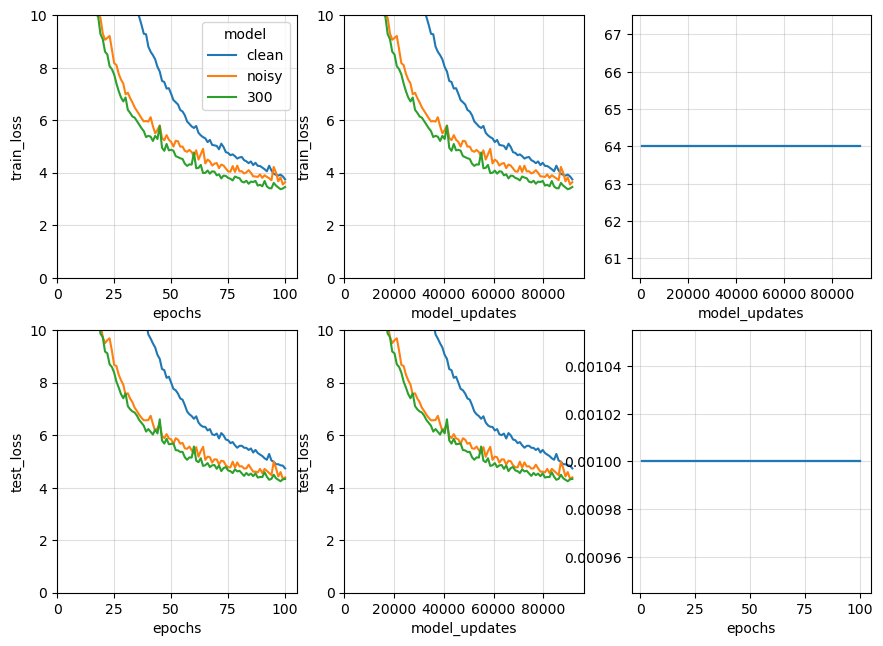

In [16]:
import seaborn as sns
w = 3
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(3.5 * w, 2.5 * w))
for j, loss in enumerate(["train_loss", "test_loss"]):
    for i, time in enumerate(["epochs", "model_updates"]):
        ax = sns.lineplot(
            x=time, y=loss, hue="model", ax=axs[j][i], data=df,
        )
        ax.set_ylim(0, 10)
        ax.set_xlim(0, None)
        ax.set_ylabel(loss)

df.plot(
    x="model_updates", y="batch_size_", ax=axs[0][2]
)
df.plot(
    x="epochs", y="lr_", ax=axs[1][2]
)
for k, ax in enumerate(axs.flatten()):
    ax.grid(alpha=0.4)
    if k > 0:
        ax.legend_.remove()